# Step 1: Install & Import Required Libraries

In [7]:
# Install SQLite3 (comes built in with python)
import sqlite3

# Install pandas for Data Analysis
import pandas as pd

# Install Seaborn & Matplotlib for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This method hides any warnings in your Jupyter Notebook
import warnings
warnings.filterwarnings("ignore")

# Step 2: Create a New SQLite Database and Table

In [10]:
# Connect to SQLite database (creates a new file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")

# Create a cursor to interact with the database
cursor = conn.cursor()

# Create a sample table
cursor. execute("""
CREATE TABLE IF NOT EXISTS sales (
sale_id INTEGER PRIMARY KEY AUTOINCREMENT,
product_name TEXT,
quantity INTERGER,
price REAL,
sale_date TEXT
)
""")

# Commit and close connection
conn.commit()

# Step 3: Insert Sample Data into the SQL Table

In [12]:
# Sample data to insert
sales= [
("Mango", 280, 500.75, "2025-08-25"),
("Orange", 355, 120.50, "2024-09-10"),
("Grapes", 220, 330.40, "2023-03-11"),
("Apple", 400, 980.90, "2024-11-27"),
("Banana", 315, 700.60, "2025-02-21")
]

# Insert data into table
cursor.executemany("INSERT INTO sales (product_name, quantity, price, sale_date) VALUES (?, ?, ?, ?)", sales)
    
# Commit changes
conn.commit()

# Step 4: Run SQL Queries Inside Jupyter Notebook

In [13]:
# Run a SQL query to retrieve all customer data
query = "SELECT * FROM sales"
df = pd.read_sql(query, conn) # Store query results in a Pandas DataFrame

# Display the data
df.head()

,sale_id,product_name,quantity,price,sale_date
0,1,Mango,280,500.75,2025-08-25
1,2,Orange,355,120.50,2024-09-10
2,3,Grapes,220,330.40,2023-03-11
3,4,Apple,400,980.90,2024-11-27
4,5,Banana,315,700.60,2025-02-21


# Step 5: Import Pandas and write the query

In [15]:
import pandas as pd

query = """
SELECT 
    product_name, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product_name
"""


# Step 6: Load query results into a DataFrame

In [16]:
df = pd.read_sql_query(query, conn)

# Step 7: Print results

In [17]:
print(df)

  product_name  total_qty   revenue
0        Apple        400  392360.0
1       Banana        315  220689.0
2       Grapes        220   72688.0
3        Mango        280  140210.0
4       Orange        355   42777.5


# Step 8: Plot the bar chart & Save chart

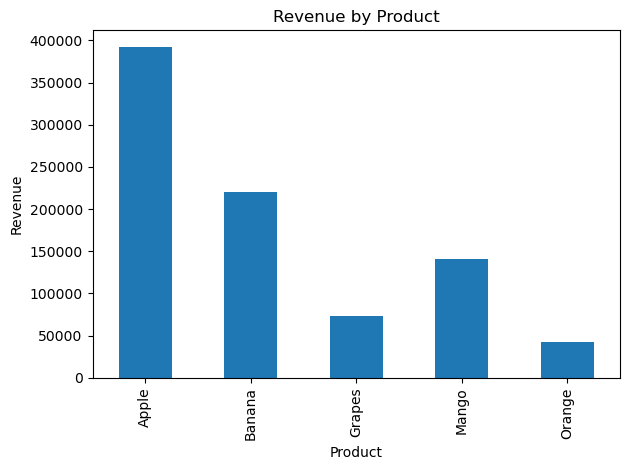

In [20]:
df.plot(kind='bar', x='product_name', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Save first
plt.savefig("sales_chart.png")

# Then show
plt.show()

# Step 9: Close the SQL Connection

In [21]:
conn.close()